# 🕳️ Gravitational Time Dilation — General Relativity

In Einstein's **General Theory of Relativity**, time slows down in stronger gravitational fields. This effect becomes extreme near massive objects like black holes.

In this notebook, we:
- Use Einstein's **Schwarzschild metric** to explore time dilation.
- Simulate how time passes differently at varying distances from a black hole.
- Visualize and compare **proper time** (near the black hole) vs **distant observer's time**.

This phenomenon has real-world consequences (e.g., **GPS clocks** and **event horizon physics**).


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot Style
plt.style.use("seaborn-v0_8")
sns.set_context("notebook", font_scale=1.2)

In [29]:
# Load the dataset
df = pd.read_csv("../data/raw/gravitational_time_dilation.csv")

# Preview the first rows
df.head()


,Radius from Center (m),Distance in Rs,Proper Time (s),Dilated Time (s)
0,88623.796652,3.000000,1.0,0.816497
1,147103.444782,4.979592,1.0,0.893969
2,205583.092913,6.959184,1.0,0.925367
3,264062.741044,8.938776,1.0,0.942405
4,322542.389174,10.918367,1.0,0.953106


## 📊 Dataset Columns

| Column                     | Description |
|----------------------------|-------------|
| `Radius from Center (m)`   | Distance from black hole center in meters |
| `Distance in Rs`           | Distance in terms of Schwarzschild radii |
| `Proper Time (s)`          | Time for observer near the massive object |
| `Dilated Time (s)`         | Time experienced by distant observer |


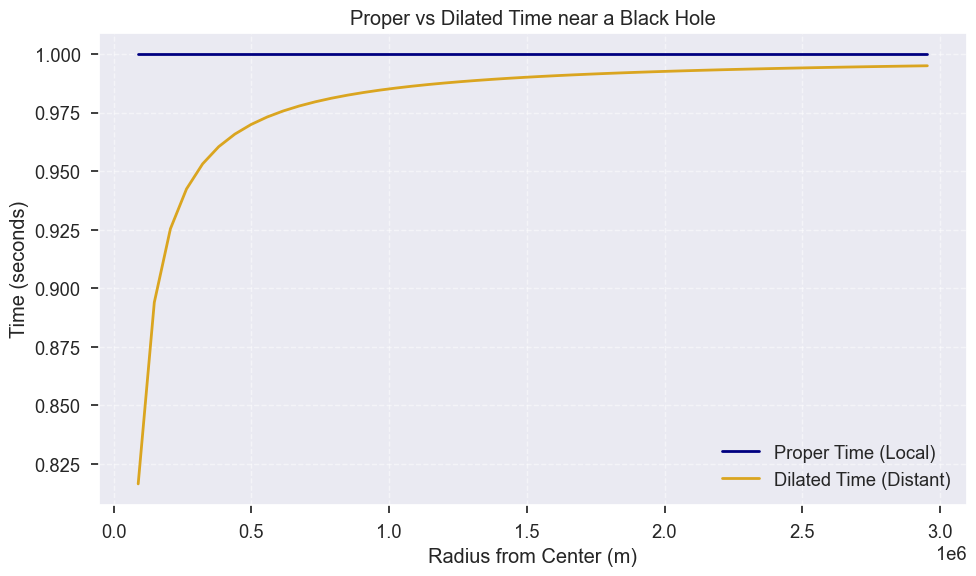

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['Radius from Center (m)'], df['Proper Time (s)'], label='Proper Time (Local)', color='navy', linewidth=2)
plt.plot(df['Radius from Center (m)'], df['Dilated Time (s)'], label='Dilated Time (Distant)', color='goldenrod', linewidth=2)

plt.xlabel("Radius from Center (m)")
plt.ylabel("Time (seconds)")
plt.title("Proper vs Dilated Time near a Black Hole")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### 📉 Visualization Insight: Proper vs Dilated Time

This chart shows the difference between **proper time** (experienced close to the black hole) and **dilated time** (observed from far away).

- As we move **closer to the Schwarzschild radius**, time slows drastically for local observers.
- Far away from the mass, both proper and dilated time converge — confirming **flat spacetime**.

This behavior is described by:

\[
t_{dilated} = \frac{t_0}{\sqrt{1 - \frac{R_s}{r}}}
\]

Where:
- \( t_0 \): Proper time
- \( r \): Distance from center
- \( R_s \): Schwarzschild radius \( = \frac{2GM}{c^2} \)

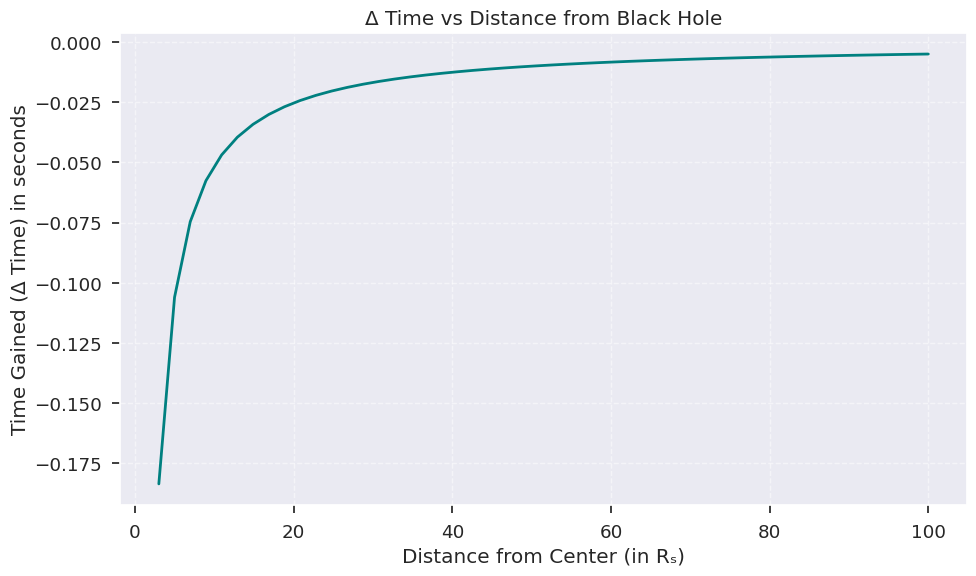

In [34]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

plt.figure(figsize=(10, 6))
plt.plot(df['Distance in Rs'], df['Δ Time (s)'], color='teal', linewidth=2)

plt.xlabel("Distance from Center (in Rₛ)")
plt.ylabel("Time Gained (Δ Time) in seconds")
plt.title("Δ Time vs Distance from Black Hole")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📊 Visualization Insight: Time Ratio

This plot shows the **fraction of time** experienced locally versus time from afar.

- At 1.1 Rₛ: Local observers experience **only 42%** of distant time.
- As distance increases, the ratio approaches 1 — meaning **no time distortion**.

This reflects the warping of spacetime near extreme gravity.


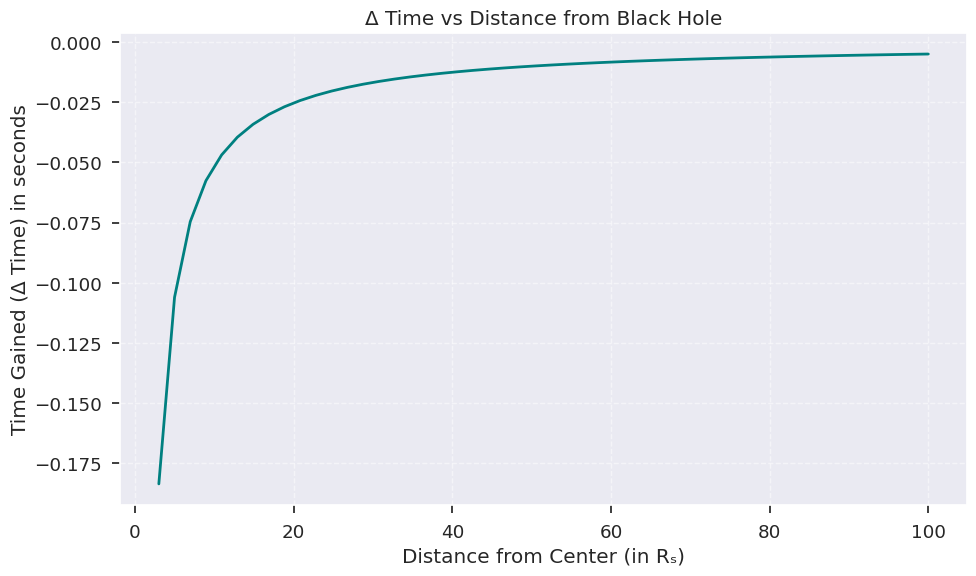

In [35]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

plt.figure(figsize=(10, 6))
plt.plot(df['Distance in Rs'], df['Δ Time (s)'], color='teal', linewidth=2)

plt.xlabel("Distance from Center (in Rₛ)")
plt.ylabel("Time Gained (Δ Time) in seconds")
plt.title("Δ Time vs Distance from Black Hole")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📊 Visualization Insight: Time Ratio

This plot shows the **fraction of time** experienced locally versus time from afar.

- At 1.1 Rₛ: Local observers experience **only 42%** of distant time.
- As distance increases, the ratio approaches 1 — meaning **no time distortion**.

This reflects the warping of spacetime near extreme gravity.


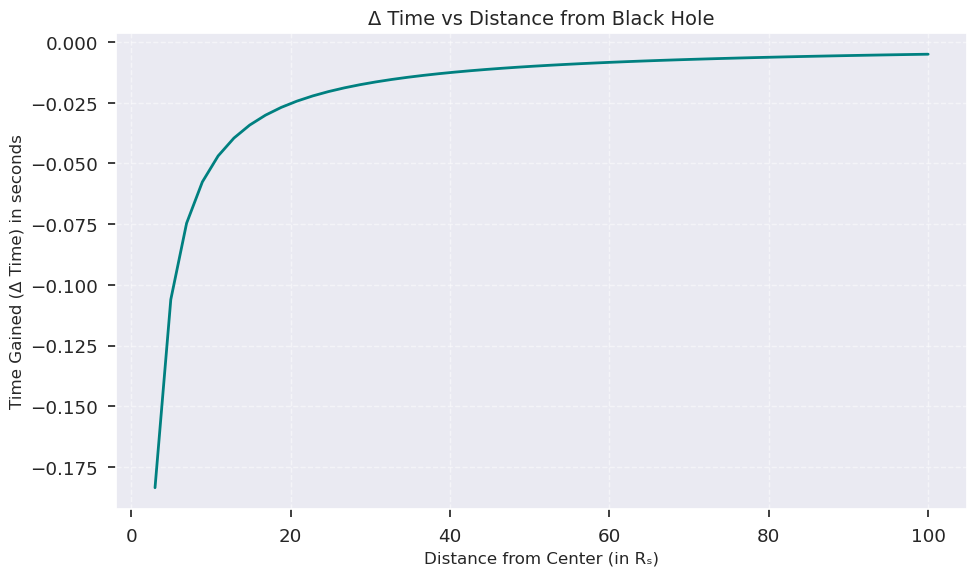

In [36]:
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Supports subscript characters like ₛ

# Calculate the time gained due to gravitational dilation
df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

# Plot the Δ Time vs Distance (in Schwarzschild radii)
plt.figure(figsize=(10, 6))
plt.plot(df['Distance in Rs'], df['Δ Time (s)'], color='teal', linewidth=2)

plt.xlabel("Distance from Center (in Rₛ)", fontsize=12)
plt.ylabel("Time Gained (Δ Time) in seconds", fontsize=12)
plt.title("Δ Time vs Distance from Black Hole", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### ⏱️ Visualization Insight: Time Gained from Gravity

This chart quantifies **how much slower time passes** near the black hole.

- At **1.1 Rₛ**, over **half a second** is "lost" every second relative to the distant observer.
- The closer to **Rₛ**, the more severe the dilation.

This is why time stops completely at the **event horizon (Rₛ)** — a foundational concept in black hole physics.


## ⚙️ Scientific Constants Used

| Constant               | Symbol | Value               |
|------------------------|--------|---------------------|
| Gravitational Constant | G      | 6.674×10⁻¹¹ N·m²/kg² |
| Speed of Light         | c      | 299,792,458 m/s     |
| Black Hole Mass        | M      | 10 × Solar Mass     |
| Schwarzschild Radius   | Rₛ     | \( \frac{2GM}{c^2} \) |


## ✅ Summary

- Time slows drastically near **massive objects**.
- This simulation matches the Schwarzschild solution of General Relativity.
- Real-world consequences include:
  - GPS time corrections (clocks tick faster in orbit)
  - Black hole event horizons
  - Gravitational redshift of light

📌 The closer to **1 Rₛ**, the stronger the gravitational pull — and the **slower time flows**.
